# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [56]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Markdown, FileLink, Math, Latex

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [97]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
display(clean_hospital_read_df.sample(10))
display(clean_hospital_read_df.describe())

numeric_vars = ['Provider Number','Number of Discharges','Excess Readmission Ratio','Number of Readmissions']
#sns.pairplot(clean_hospital_read_df.filter(numeric_vars),kind="scatter")
#plt.show()

#print(clean_hospital_read_df.loc[:,'Footnote'].unique())

/var/cache/udocker/phoenix-worker/targaryen/python3/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
969,ARNOT OGDEN MEDICAL CENTER,330090,NY,READM-30-PN-HRRP,522,NaN,1.1312,21.7,19.2,121.0,07/01/2010,06/30/2013
9167,NORTH KANSAS CITY HOSPITAL,260096,MO,READM-30-COPD-HRRP,628,NaN,0.9665,17.7,18.4,109.0,07/01/2010,06/30/2013
13319,MARGARET R PARDEE MEMORIAL HOSPITAL,340017,NC,READM-30-HF-HRRP,397,NaN,0.8389,18.1,21.6,62.0,07/01/2010,06/30/2013
5534,DORMINY MEDICAL CENTER,110073,GA,READM-30-COPD-HRRP,134,NaN,1.0165,20.0,19.7,28.0,07/01/2010,06/30/2013
10625,PRESBYTERIAN INTERCOMMUNITY HOSPITAL,50169,CA,READM-30-COPD-HRRP,259,NaN,0.9439,21.0,22.2,50.0,07/01/2010,06/30/2013
10639,COLQUITT REGIONAL MEDICAL CENTER,110105,GA,READM-30-PN-HRRP,243,NaN,0.9436,15.8,16.7,35.0,07/01/2010,06/30/2013
1099,NORTHERN WESTCHESTER HOSPITAL,330162,NY,READM-30-HF-HRRP,398,NaN,1.1220,22.7,20.2,97.0,07/01/2010,06/30/2013
2242,ALLEGHENY VALLEY HOSPITAL,390032,PA,READM-30-HF-HRRP,394,NaN,1.0788,24.7,22.9,102.0,07/01/2010,06/30/2013
12215,WESTERLY HOSPITAL,410013,RI,READM-30-HF-HRRP,303,NaN,0.9065,20.4,22.5,56.0,07/01/2010,06/30/2013
12475,COMMUNITY HOSPITAL SOUTH,150128,IN,READM-30-HF-HRRP,410,NaN,0.8968,21.1,23.5,80.0,07/01/2010,06/30/2013


,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


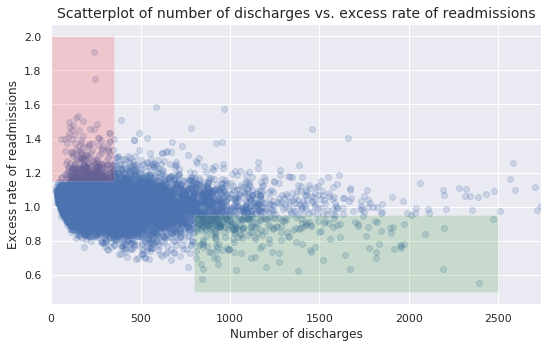

In [98]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [99]:
from numpy import corrcoef
xr = clean_hospital_read_df.loc[clean_hospital_read_df.loc[:,'Excess Readmission Ratio'].notnull(),'Number of Discharges']
yr = clean_hospital_read_df.loc[clean_hospital_read_df.loc[:,'Excess Readmission Ratio'].notnull(), 'Excess Readmission Ratio']
pear_r = corrcoef(x=xr,y=yr)
display(pear_r)

pr = clean_hospital_read_df.filter(['Number of Discharges','Excess Readmission Ratio']).corr()
display(pr)

array([[ 1.        , -0.09739794],
       [-0.09739794,  1.        ]])

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.097398
Excess Readmission Ratio,-0.097398,1.000000


****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?

### Answer
The analysis itself does demonstrate a slight indirect relationship between these two variables. However, the correlation is very weak.

B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### Answer
#### I. Hypothesis Test

In [100]:
null_hyp_lat = r'\ H_0: \rho = 0'
display(Markdown(r"*Our Null Hypothesis:* Number of discharges is **NOT** significantly correlated with excess rates of readmissions."))
display(Math(null_hyp_lat))

alt_hyp_lat = r'\ H_a: \rho \neq 0'
display(Markdown("*Our Alternate Hypothesis:* Number of discharges **IS** significantly correlated with excess rates of readmissions."))
display(Math(alt_hyp_lat))

display(Markdown('Where:'))
display(Math(r'\alpha = 0.05'))
display(Markdown('---'))

*Our Null Hypothesis:* Number of discharges is **NOT** significantly correlated with excess rates of readmissions.

<IPython.core.display.Math object>

*Our Alternate Hypothesis:* Number of discharges **IS** significantly correlated with excess rates of readmissions.

<IPython.core.display.Math object>

Where:

<IPython.core.display.Math object>

---

#### II. Significance Value

In [101]:
from scipy.stats import pearsonr

#Use Scipy correlation function to determine confidence Interval
pear_coef, p_value = pearsonr(xr,yr)
print("r = {}".format(pear_coef))
print("p value = {}".format(p_value))
alph = 0.01
print("alpha = {}".format(alph))

r = -0.0973979435107935
p value = 1.2225473776790449e-25
alpha = 0.01


#### III. Statistical Significance
Since our p value is smaller than alpha, the negative correlation shown in the preliminary analysis is significant.


#### IV. Statistical Significance vs. Practical Significance
However, while the correlation is not likely due to chance, the correlation is also a weak correlation -0.1 < r < 0. i.e. other factors may have a stronger relationship with *Excess rate of readmissions* such as quality control metrics or staff continuing education.

#### V. Pros/Cons of Scatterplot to Visulaize Linear Relationship
Pros: The scatter plot is very helpful when it comes to exploring data. The viewer can see each data point as well as the "cloud".

Cons: If the analyst wants to demonstrate a relationship between two variables, then adding a line to the chart can help redirect the eye towards what they should see.

### Number of Discharges indirectly related to Excess Readmission

##### More discharges related to lower Readmission Ratio

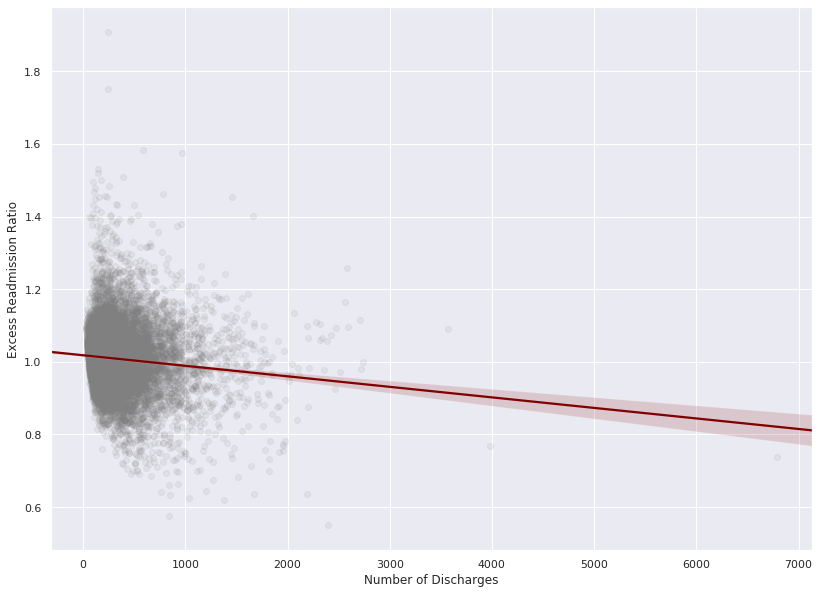

In [102]:
lindf = clean_hospital_read_df.filter(['Number of Discharges','Excess Readmission Ratio'])


display(Markdown("### Number of Discharges indirectly related to Excess Readmission"))
display(Markdown("##### More discharges related to lower Readmission Ratio"))
fig = plt.figure(figsize=(30,10))
fig.add_subplot(121)
sns.regplot(
    x='Number of Discharges'
    ,y='Excess Readmission Ratio'
    , data=lindf
    ,fit_reg=True
    ,scatter_kws={'alpha':0.1,'color':'grey'}
    ,line_kws={'color':'maroon'}
)
plt.show()
